# Customizing and exporting graphical models and CPTs as image (pdf, png)

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
from pylab import *
import matplotlib.pyplot as plt


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [3]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
gnb.flow.row(bn,gnb.getInference(bn))

## customizing colours and width for model and inference

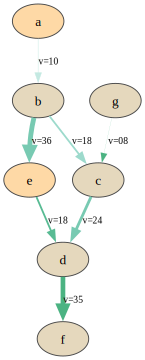

In [4]:
def nodevalue(n):
    return 0.5 if n in "aeiou" else 0.7
def arcvalue(a):
    return (10-a[0])*a[1]
def arcvalue2(a):
    return (a[0]+a[1]+5)/22
gnb.showBN(bn,
           nodeColor={n:nodevalue(n) for n in bn.names()},
           arcWidth={a:arcvalue(a) for a in bn.arcs()},
           arcLabel={a:f"v={arcvalue(a):02d}" for a in bn.arcs()},
           arcColor={a:arcvalue2(a) for a in bn.arcs()})

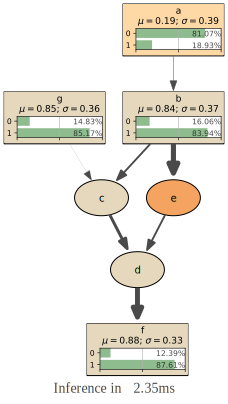

In [5]:
gnb.showInference(bn,
           targets={"a","g","f","b"},
           evs={'e':0},
           nodeColor={n:nodevalue(n) for n in bn.names()},
           arcWidth={a:arcvalue(a) for a in bn.arcs()})

In [6]:
gnb.flow.row(gnb.getBN(bn,
                       nodeColor={n:nodevalue(n) for n in bn.names()},
                       arcWidth={a:arcvalue(a) for a in bn.arcs()}),
             gnb.getInference(bn,
                              nodeColor={n:nodevalue(n) for n in bn.names()},
                              arcWidth={a:arcvalue(a) for a in bn.arcs()})
            )

In [7]:
import matplotlib.pyplot as plt
mycmap=plt.get_cmap('Reds')
formyarcs=plt.get_cmap('winter')
gnb.flow.row(gnb.getBN(bn,
                       nodeColor={n:nodevalue(n) for n in bn.names()},
                       arcColor={a:arcvalue2(a) for a in bn.arcs()},
                       cmapNode=mycmap,
                       cmapArc=formyarcs),
             gnb.getInference(bn,
                              nodeColor={n:nodevalue(n) for n in bn.names()},
                              arcColor={a:arcvalue2(a) for a in bn.arcs()},
                              arcWidth={a:arcvalue(a) for a in bn.arcs()},
                              cmapNode=mycmap,
                              cmapArc=formyarcs)
              )

## Modifying graph's layout

Every graph or graphical models can be translated into a pyDot's representaton (a `pydot.Dot` object). In this graphical representation, it is possible to manipulate the positions of the node. pyAgrum proposes two functions `gum.utils.dot_layout` to help modifying this layout.

### Layout for Bayesian network

In [8]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.utils as gutils
import pyAgrum.lib.bn2graph as gumb2g

bn=gum.fastBN("A->B<-C<-D")
bn2=gum.fastBN("A->B->C<-D")

graph=gumb2g.BN2dot(bn)

graph2=gumb2g.BN2dot(bn2)
l=gutils.dot_layout(graph)
print(f"Layout proposed by dot for BN :{l}")
gutils.apply_dot_layout(graph2,l)

graph3=gumb2g.BN2dot(bn2)
#l["C"],l["A"]=l["A"],l["C"]
l["D"],l["C"],l["B"],l["A"]=(gutils.DotPoint(0,0),
                             gutils.DotPoint(1,1),
                             gutils.DotPoint(2,2),
                             gutils.DotPoint(3,3))
gutils.apply_dot_layout(graph3,l)
gnb.flow.row(bn,bn2,graph2,graph3,
              captions=["BN","BN2","BN2 with the same layoutas BN","Layout changed by hand"])

Layout proposed by dot for BN :{'D': DotPoint(x=0.375, y=2.25), 'C': DotPoint(x=0.375, y=1.25), 'B': DotPoint(x=0.875, y=0.25), 'A': DotPoint(x=1.375, y=1.25)}


### Layout for other graphical models and for inference

In [9]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.utils as gutils
import pyAgrum.lib.id2graph as gum2gr

model=gum.fastID("*D->$L<-E<-H->L;E->D")
gnb.flow.add(model)
gum.config.push()
gum.config['influenceDiagram','utility_shape']='diamond'

figure=gum2gr.ID2dot(model)
l=gutils.dot_layout(figure)

# changing LAYOUT
# making some horizontal space
for i,p in l.items():
    l[i]=gutils.DotPoint(1.5*p.x,p.y)
# E at the vertical of L, at the horizontal of D
l['E']=gutils.DotPoint(l['L'].x,
                       l['D'].y)
# H symetric of D w.r.t (EL)
l['H']=gutils.DotPoint(2*l['E'].x-l['D'].x,l['D'].y)

gutils.apply_dot_layout(figure,l)
gnb.flow.add(figure)

gnb.flow.display()
gum.config.pop()

In [10]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.utils as gutils
import pyAgrum.lib.id2graph as gum2gr

model=gum.fastID("*D->$L<-E<-H->L;E->D")
gnb.flow.add(gnb.getInference(model))

figure=gum2gr.LIMIDinference2dot(model,evs={},targets={},size=None,engine=None)
l=gutils.dot_layout(figure)

# changing LAYOUT
# making some horizontal space
for i,p in l.items():
    l[i]=gutils.DotPoint(3*p.x,p.y)
# E at the vertical of L, at the horizontal of D
l['E']=gutils.DotPoint(l['L'].x,
                       l['D'].y)
l['D']=gutils.DotPoint(l['D'].x/2,l['D'].y)
l['H']=gutils.DotPoint(l['L'].x*3/2,
                       l['D'].y)

gutils.apply_dot_layout(figure,l)
gnb.flow.add(figure)

gnb.flow.display()

## Exporting model and inference as image

Exporting as image (pdf, png, etc.) has been gathered in 2 functions : `pyAgrum.lib.image.export()` and `pyAgrum.lib.image.exportInference()`. The argument are the same as for `pyAgrum.notebook.show{Model}` and `pyAgrum.notebook.show{Inference}`.

In [11]:
import pyAgrum.lib.image as gumimage
from IPython.display import Image # to display the exported images

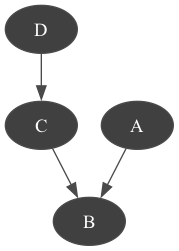

In [12]:
gumimage.export(bn,"out/test_export.png")

Image(filename='out/test_export.png') 

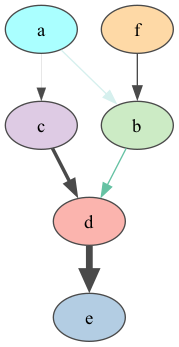

In [13]:
bn = gum.fastBN("a->b->d;a->c->d[3]->e;f->b")
gumimage.export(bn,"out/test_export.png",
                nodeColor={'a': 1,
                           'b': 0.3,
                           'c': 0.4,
                           'd': 0.1,
                           'e': 0.2,
                           'f': 0.5},
                arcColor={(0, 1): 0.2,
                          (1, 2): 0.5},
                arcWidth={(0, 3): 0.4,
                          (3, 2): 0.5,
                          (2,4) :0.6})

Image(filename='out/test_export.png') 

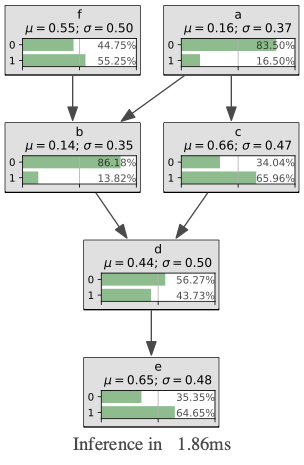

In [14]:
gumimage.exportInference(bn,"out/test_export.png")

Image(filename='out/test_export.png')

In [15]:
gumimage.export(bn,"out/test_export.pdf")

<a href="out/test_export.pdf" target="_blank">Link to <tt>out/test_export.pdf</tt></a>


### exporting inference with evidence

In [16]:
bn=gum.loadBN("res/alarm.dsl")
gumimage.exportInference(bn,"out/test_export.pdf", 
                         evs={"CO":1,"VENTLUNG":1},
                         targets={"VENTALV",
                                  "CATECHOL",
                                  "HR",
                                  "MINVOLSET",
                                  "ANAPHYLAXIS",
                                  "STROKEVOLUME",
                                  "ERRLOWOUTPUT",
                                  "HBR",
                                  "PULMEMBOLUS",
                                  "HISTORY",
                                  "BP",
                                  "PRESS",
                                  "CO"},
                         size="15!")

<a href="out/test_export.pdf" target="_blank">Link to <tt>out/test_export.pdf</tt></a>

### Other models

Other models can also use these functions.

In [17]:
infdiag=gum.loadID("res/OilWildcatter.bifxml")
gumimage.export(infdiag,"out/test_export.pdf")

<a href="out/test_export.pdf" target="_blank">Link to <tt>out/test_export.pdf</tt></a>

In [18]:
gumimage.exportInference(infdiag,"out/test_export.pdf")

<a href="out/test_export.pdf" target="_blank">Link to <tt>out/test_export.pdf</tt></a>

### Exporting any object with `toDot()` method

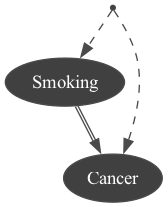

In [19]:
import pyAgrum.causal as csl
obs1 = gum.fastBN("Smoking->Cancer")
modele3 = csl.CausalModel(obs1, [("Genotype", ["Smoking","Cancer"])], True)
gumimage.export(modele3,"out/test_export.png") # a causal model has a toDot method.
Image(filename='out/test_export.png')

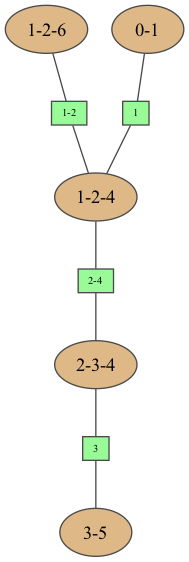

In [20]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
ie=gum.LazyPropagation(bn)
jt=ie.junctionTree()
gumimage.export(jt,"out/test_export.png") # a JunctionTree has a method jt.toDot()
Image(filename='out/test_export.png')

### ... or even a string in dot syntax

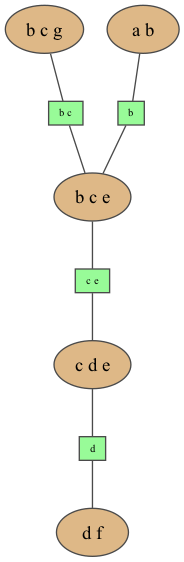

In [21]:
gumimage.export(jt.toDotWithNames(bn),"out/test_export.png") # jt.toDotWithNames(bn) creates a dot-string for a junction tree with names of variables
Image(filename='out/test_export.png')

### Exporting to pyplot

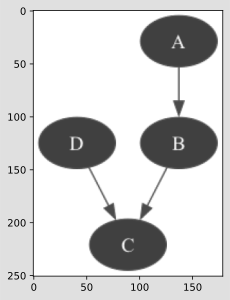

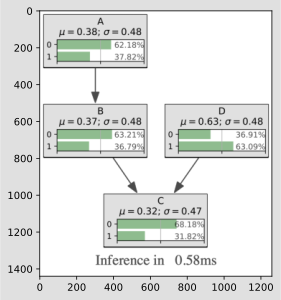

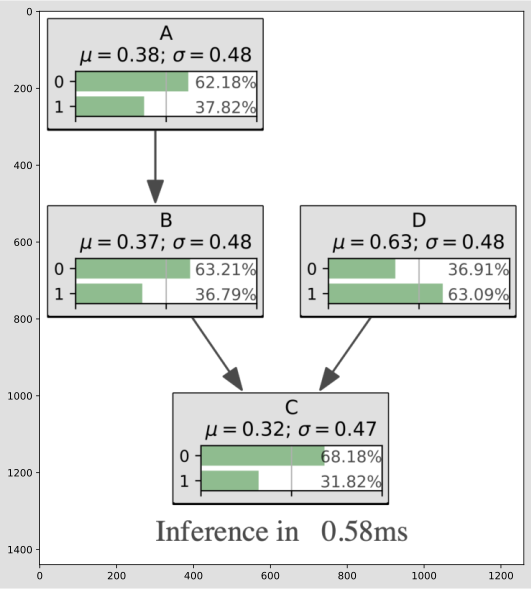

In [23]:
import matplotlib.pyplot as plt

bn=gum.fastBN("A->B->C<-D")

plt.imshow(gumimage.export(bn))
plt.show()

plt.imshow(gumimage.exportInference(bn,size="15!"))
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(gumimage.exportInference(bn,size="15!"))
plt.show()

## Exporting CPTs, sideBySide, explain.Information (and other html strings)
pyAgrum uses the package playwright in order to export html string. It proposes a function `pyAgrum.utils.async_html2image`. In `pyAgrum.notebook`, the functions `get...` return HTML objects. The functions `show...` display the result.

As a result, every `pyAgrum.lib.notebook.get...` can be exported as pdf, png ... using `pyAgrum.utils.async_html2image`.

In [38]:
bn=gum.fastBN("A->B<-C",3)
await gutils.async_html2image(gnb.getPotential(bn.cpt("B")),"out/cpt_B_.pdf")

In [39]:
await gutils.async_html2image(gnb.getSideBySide(bn,bn.cpt("A"),bn.cpt("B"),bn.cpt("C")),"out/sideBySide.pdf")

In [40]:
import pyAgrum.lib.explain as gexplain
await gutils.async_html2image(gexplain.getInformation(bn),"out/informationBN.pdf")